Nesse notebook foi realizado a análise de expressões faciais em imagens estáticas, para a identificação das emoções das pessoas das imagens

In [43]:
import pandas as pd
from warnings import simplefilter

Removendo Warnings

In [44]:
simplefilter(action='ignore', category=FutureWarning)

Carregando os dados 

In [38]:
df = pd.read_csv('./df_imagens.csv')
df.head()

,0,1,2,3,4,5,6,7,8,9,...,122491,122492,122493,122494,122495,122496,122497,122498,122499,label
0,8,8,8,8,9,9,9,10,10,9,...,20,20,20,21,21,21,21,21,21,0
1,1,1,1,1,1,1,1,1,1,1,...,74,72,70,68,67,66,66,66,66,0
2,2,2,2,2,2,2,2,2,2,2,...,90,91,92,93,94,95,95,96,96,0
3,2,2,2,3,4,4,4,3,3,4,...,24,23,23,22,22,22,22,22,22,0
4,1,1,1,1,1,0,0,0,0,0,...,20,20,20,19,19,19,19,19,19,0


Separando os dados de treino e de teste

In [32]:
X = df.drop('label', axis=1).copy()
y = df['label'].copy()

### Treinando um classificador

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [45]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Resultado da Análise: {:.2f}%".format(accuracy_score(y_test, y_pred)*100))

Resultado da Análise: 33.33%


### Utilizando Cross Validation

In [48]:
from sklearn.model_selection import cross_val_predict

cv = cross_val_predict(clf, X, y, cv=10, n_jobs=-1)

Confusion Matrix

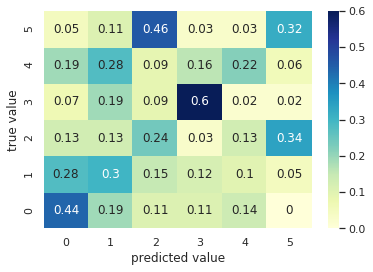

In [77]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


mat = confusion_matrix(y, cv)
row_sums = mat.sum(axis=1, keepdims=True)
norm_conf_mx = mat/row_sums

sns.heatmap(pd.DataFrame(norm_conf_mx.round(2)), 
            annot=True, 
            fmt='g', 
            cmap='YlGnBu')
plt.xlabel('predicted value')
plt.ylabel('true value')
plt.axis([0,6,0,6])
plt.show()